# Benchmark of nascent UMI

In [1]:
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
path1 = "../../1_FLAIRseq/results/expression/report/gene_based_matrix/K562.treatment_cells.min_read_2_min_tc_2.total.tsv"
path2 = "../../1_FLAIRseq/results/expression/report/gene_based_matrix/K562.treatment_cells.min_read_2_min_tc_2.nascent.tsv"
dat1 = pd.read_csv(path1, sep="\t", index_col=0)
dat1 = dat1[dat1.max(axis=1) >= 1]
dat2 = pd.read_csv(path2, sep="\t", index_col=0)
dat2 = dat2[dat2.max(axis=1) >= 1]
params = [
    ["total", dat1],
    ["nascent", dat2]
]

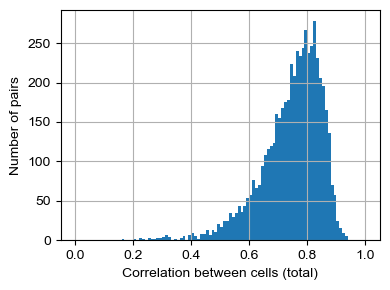

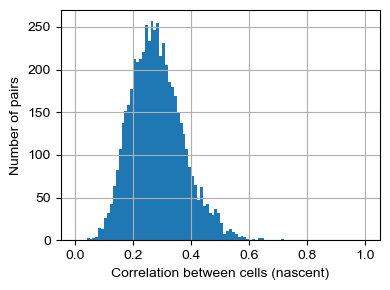

In [8]:
for name, dat in params:
    corr = dat.corr()
    vs = []
    for i in range(len(corr.values)):
        for j in range(len(corr.values)):
            if j >= i:
                break
            else:
                vs.append(corr.values[i][j])
    # vs = dat.corr().values.flatten()
    plt.figure(figsize=(4, 3))
    plt.hist(vs, range=(0, 1), bins=100)
    plt.grid()
    plt.xlabel("Correlation between cells (%s)" % name) 
    plt.ylabel("Number of pairs")
    plt.tight_layout()
    plt.show()
    plt.close()

In [11]:
for k, v in sorted(Counter([x.split(".")[0] for x in dat2.columns]).items()):
    print(k, v, sep="\t")

20220719_K562R4	17
20220729_K562R1	32
20220729_K562R2	40
20221014_K562R1	16


In [12]:
m1 = dat2[list(filter(lambda c: c.startswith("20220729_K562R1"), dat2.columns))]
m2 = dat2[list(filter(lambda c: c.startswith("20220729_K562R2"), dat2.columns))]
print(len(m1.columns), len(m2.columns))

32 40


0.9488859206971949
0.9482193913891032
0.25741079723565496


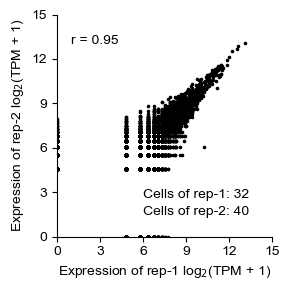

In [13]:
s1 = m1.sum(axis=1) # counts
s2 = m2.sum(axis=1)

xs = s1 * 1e6 / sum(s1) # TPM
ys = s2 * 1e6 / sum(s2)
r1 = np.corrcoef(xs, ys)[0][1]
print(r1)

# flags = (xs >= 0) & (ys >= 0)
flags = xs + ys > 0
xs = xs[flags]
ys = ys[flags]
r2 = np.corrcoef(xs, ys)[0][1]
print(r2)

xs = np.log2(xs + 1) # log2
ys = np.log2(ys + 1)
r3 = np.corrcoef(xs, ys)[0][1]
print(r3)

plt.figure(figsize=(3, 3))
plt.scatter(xs, ys, marker=".", s=10, color="black")
# sns.kdeplot(x=xs, y=ys, fill=True, cmap='Blues', cbar=False, alpha=1, zorder=2)
plt.text(1, 13, "r = %.2f" % r2)
plt.text(6, 2.6, "Cells of rep-1: %d" % len(m1.columns))
plt.text(6, 1.5, "Cells of rep-2: %d" % len(m2.columns))
plt.xlim(0, 15)
plt.ylim(0, 15)
plt.xticks([0, 3, 6, 9, 12, 15])
plt.yticks([0, 3, 6, 9, 12, 15])
plt.xlabel("Expression of rep-1 log$_2$(TPM + 1)")
plt.ylabel("Expression of rep-2 log$_2$(TPM + 1)")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("figures/correlation.K562.run1_vs_run2.nascent.pdf", dpi=300)